# -- IMPORT LIBRARIES --

In [0]:
from fastai.vision import *
import numpy as np

# -- DEFINE THE DATA FILES AND FOLDERS --

In [0]:
folders = ['illidan', 'garrosh', 'varian', 'murloc']
files = ['illidan.csv', 
         'garrosh.csv', 
          'varian.csv', 
          'murloc.csv'
        ]
fold_file = list(zip(folders,files))

In [0]:

for folder in folders:
  path = Path('data/characters')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  print(path/folder, file)

In [0]:
#for folder in folders:
#  path = Path('data/characters')
#  dest = path/folder

In [12]:
path.ls()

[PosixPath('data/characters/garrosh'),
 PosixPath('data/characters/murloc'),
 PosixPath('data/characters/varian'),
 PosixPath('data/characters/illidan')]

# -- DOWNLOAD IMAGES --

In [0]:
classes = ['illidan', 'varian', 'garrosh', 'murloc']

In [0]:
for nom in classes:
  download_images(path/nom/f"{nom}.csv", path/nom, max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size = 500)

# -- VIEW DATA --

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.',
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(),
                                  size=224,
                                  num_workers=4).normalize(imagenet_stats)

In [19]:
data.classes

['garrosh', 'illidan', 'murloc', 'varian']

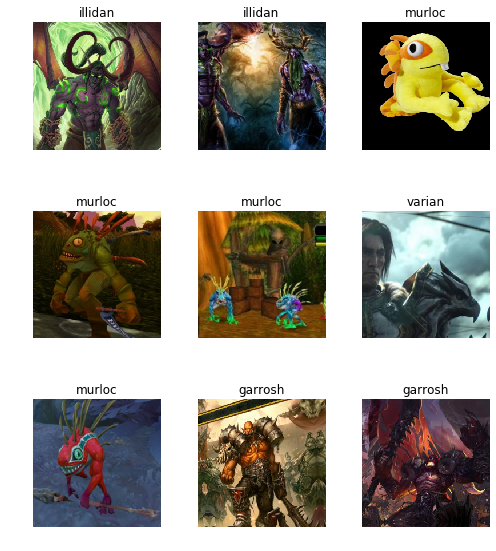

In [20]:
data.show_batch(rows=3, figsize=(7,8))

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['garrosh', 'illidan', 'murloc', 'varian'], 4, 311, 77)

In [22]:
data

ImageDataBunch;

Train: LabelList (311 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
garrosh,garrosh,garrosh,garrosh,garrosh
Path: data/characters;

Valid: LabelList (77 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
varian,garrosh,murloc,garrosh,illidan
Path: data/characters;

Test: None

# -- TRAIN AND OPTIMIZE THE MODEL --

In [23]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 48.9MB/s]


In [24]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.259009,0.824237,0.376623,00:08
1,1.590921,0.325309,0.116883,00:06
2,1.175075,0.263909,0.077922,00:06
3,0.930073,0.209067,0.064935,00:06
4,0.776681,0.195616,0.064935,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


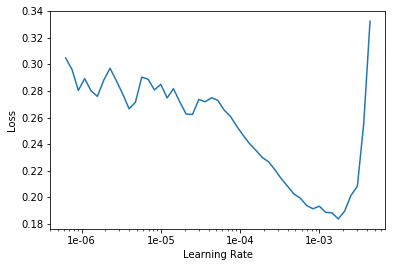

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(5, max_lr = slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.290517,0.255649,0.077922,00:07
1,0.216872,0.276475,0.103896,00:07
2,0.201018,0.333692,0.103896,00:07
3,0.173559,0.381594,0.090909,00:07
4,0.155678,0.346990,0.090909,00:07


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


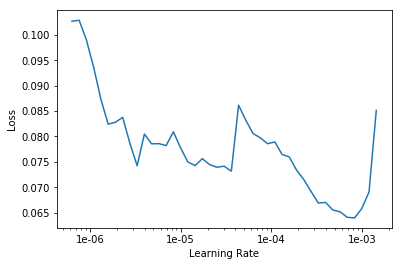

In [33]:
learn.recorder.plot()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

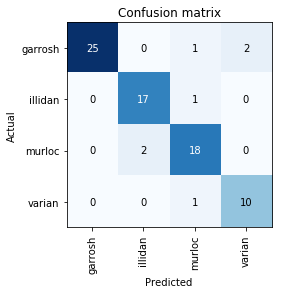

In [35]:
interp.plot_confusion_matrix()

# -- CLEANING UP DATA --

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
      .split_none()
      .label_from_folder()
      .transform(get_transforms(), size=224)
      .databunch())

In [38]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (388 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
garrosh,garrosh,garrosh,garrosh,garrosh
Path: data/characters;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/characters;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1

In [0]:
ds, idxs=DatasetFormatter().from_toplosses(learn_cln)

In [40]:
ds, idsx = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
# ImageCleaner(ds, idxs, path, duplicates=True)

In [0]:
# defaults.device = torch.device('cpu')

# TESTING OUT THE MODEL

In [0]:
learn.export()

In [0]:
img = open_image(path/'varian'/'00000034.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class